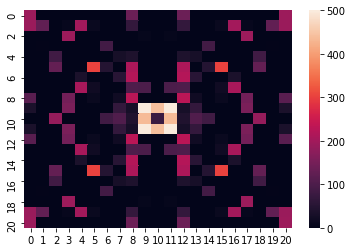

In [1]:
from kaggle_environments import evaluate, make
import seaborn as sns
import numpy as np


env = make("halite", debug=True)
obs=env.step([{}])[0].observation
board=np.reshape(np.float32(obs.halite),(21,21))
sns.heatmap(board)
env.render(mode="ipython", width=800, height=600)

In [13]:
np.set_printoptions(linewidth=160)
import math

In [10]:
def position(num):
    x=num%5
    y=num//5
    return (y,x)

In [11]:
print(np.reshape(range(0,5*5),(5,5)))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [12]:
position(6)

(1, 1)

In [9]:
print(np.tile(np.reshape(range(0,5*5),(5,5)),(3,3)))

[[ 0  1  2  3  4  0  1  2  3  4  0  1  2  3  4]
 [ 5  6  7  8  9  5  6  7  8  9  5  6  7  8  9]
 [10 11 12 13 14 10 11 12 13 14 10 11 12 13 14]
 [15 16 17 18 19 15 16 17 18 19 15 16 17 18 19]
 [20 21 22 23 24 20 21 22 23 24 20 21 22 23 24]
 [ 0  1  2  3  4  0  1  2  3  4  0  1  2  3  4]
 [ 5  6  7  8  9  5  6  7  8  9  5  6  7  8  9]
 [10 11 12 13 14 10 11 12 13 14 10 11 12 13 14]
 [15 16 17 18 19 15 16 17 18 19 15 16 17 18 19]
 [20 21 22 23 24 20 21 22 23 24 20 21 22 23 24]
 [ 0  1  2  3  4  0  1  2  3  4  0  1  2  3  4]
 [ 5  6  7  8  9  5  6  7  8  9  5  6  7  8  9]
 [10 11 12 13 14 10 11 12 13 14 10 11 12 13 14]
 [15 16 17 18 19 15 16 17 18 19 15 16 17 18 19]
 [20 21 22 23 24 20 21 22 23 24 20 21 22 23 24]]


In [8]:
print(np.reshape(range(0,5*5*9),(5*3,5*3)))

[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14]
 [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29]
 [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44]
 [ 45  46  47  48  49  50  51  52  53  54  55  56  57  58  59]
 [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74]
 [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89]
 [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
 [105 106 107 108 109 110 111 112 113 114 115 116 117 118 119]
 [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134]
 [135 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
 [150 151 152 153 154 155 156 157 158 159 160 161 162 163 164]
 [165 166 167 168 169 170 171 172 173 174 175 176 177 178 179]
 [180 181 182 183 184 185 186 187 188 189 190 191 192 193 194]
 [195 196 197 198 199 200 201 202 203 204 205 206 207 208 209]
 [210 211 212 213 214 215 216 217 218 219 220 221 222 223 224]]


In [51]:
o_x=1
o_y=-1
d_x=4
d_y=-2

delta_x=d_x-o_x
delta_y=d_y-o_y

degrees_temp = math.atan2(delta_x, delta_y)/math.pi*180

if degrees_temp < 0:
    degrees_temp = degrees_temp+360

print(degrees_temp)    

directions=["N","NE","E","SE","S","SW","W","NW","N"]

directions[round(degrees_temp/45)]

108.43494882292201


'E'

In [71]:
def getCompass(o_x,o_y,d_x,d_y):
    
    o_y=o_y*-1
    d_y=d_y*-1
    
    delta_x=d_x-o_x
    delta_y=d_y-o_y

    degrees = math.atan2(delta_x, delta_y)/math.pi*180
    
    alt=[degrees,degrees+90,degrees-90]
    
    for i,a in enumerate(alt):
        if a < 0:
            alt[i]=a+360

    directions=[["NORTH"],["NORTH","EAST"],["EAST"],["SOUTH","EAST"],["SOUTH"],["SOUTH","WEST"],["WEST"],["NORTH","WEST"],["NORTH"]]

    return directions[round(alt[0]/45)],directions[round(alt[1]/45)],directions[round(alt[2]/45)]   

In [88]:
def metaposition(meta):
    x=meta%(5*3)
    y=meta//(5*3)
    return(y,x)

def toMetanum(num):
    metanum=25*3+5+(5*2)*math.floor(num/5)+num
    return metanum


In [95]:
def nextdirection(meta_cur,meta_to,controls,boardradius):
    metaboard=np.tile(np.reshape(range(0,boardradius*boardradius),(boardradius,boardradius)),(3,3)).reshape(-1)
    
    print(metaboard)
    meta_p_cur=metaposition(meta_cur)
    meta_p_to=metaposition(meta_to)
    org_cur=metaboard[meta_cur]
    org_to=metaboard[meta_to]
    
    ddict={}
    ddict["NORTH"]=org_cur-boardradius
    ddict["SOUTH"]=org_cur+boardradius
    ddict["EAST"]=org_cur+1
    ddict["WEST"]=org_cur-1
    
    prio,alt1,alt2=getCompass(meta_p_cur[1],meta_p_cur[0],meta_p_to[1],meta_p_to[0])
    
    alt=alt1+alt2
    
    print(ddict)
    print(org_cur)
    
    for d in prio:
        print(f"Trying {d}")
        if ddict[d] in controls["blockedMoving"]+controls["blockedCurMining"]:
            print(f"Blocked {d}")
            continue
        else:
            controls["blockedmoving"]=ddict[d]
            print(f"Choosing {d}")
            return d
    
    for d in prio:
        print(f"Trying {d}")
        if ddict[d] in controls["blockedMoving"]:
            print(f"Waiting {d}")
            return None
            
    for d in alt:
        if ddict[d] in controls["blockedMoving"]+controls["blockedCurMining"]:
            print(f"Blocked {d}")
            continue
        else:
            controls["blockedMoving"]=ddict[d]
            print(f"Choosing {d}")
            return d
        
    return None

In [97]:
controls={}
controls["blockedMoving"]=[12]
controls["blockedCurMining"]=[13]

nextdirection(toMetanum(11),toMetanum(13),controls,5)

[ 0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  5  6  7  8  9  5  6  7  8  9  5  6  7  8  9 10 11 12 13 14 10 11 12 13 14 10 11 12 13 14 15 16 17 18 19 15 16 17
 18 19 15 16 17 18 19 20 21 22 23 24 20 21 22 23 24 20 21 22 23 24  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  5  6  7  8  9  5  6  7  8  9  5  6  7  8  9 10
 11 12 13 14 10 11 12 13 14 10 11 12 13 14 15 16 17 18 19 15 16 17 18 19 15 16 17 18 19 20 21 22 23 24 20 21 22 23 24 20 21 22 23 24  0  1  2  3  4  0  1  2  3
  4  0  1  2  3  4  5  6  7  8  9  5  6  7  8  9  5  6  7  8  9 10 11 12 13 14 10 11 12 13 14 10 11 12 13 14 15 16 17 18 19 15 16 17 18 19 15 16 17 18 19 20 21
 22 23 24 20 21 22 23 24 20 21 22 23 24]
[90.0, 180.0, 0.0]
{'NORTH': 6, 'SOUTH': 16, 'EAST': 12, 'WEST': 10}
11
Trying EAST
Blocked EAST
Trying EAST
Waiting EAST


In [98]:
[0,1,2]*3

[0, 1, 2, 0, 1, 2, 0, 1, 2]